In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib as jb

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('personality_dataset.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [3]:
df.shape

(2900, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [5]:
df.columns = df.columns.str.lower().str.strip()

In [6]:
df.describe()

,time_spent_alone,social_event_attendance,going_outside,friends_circle_size,post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


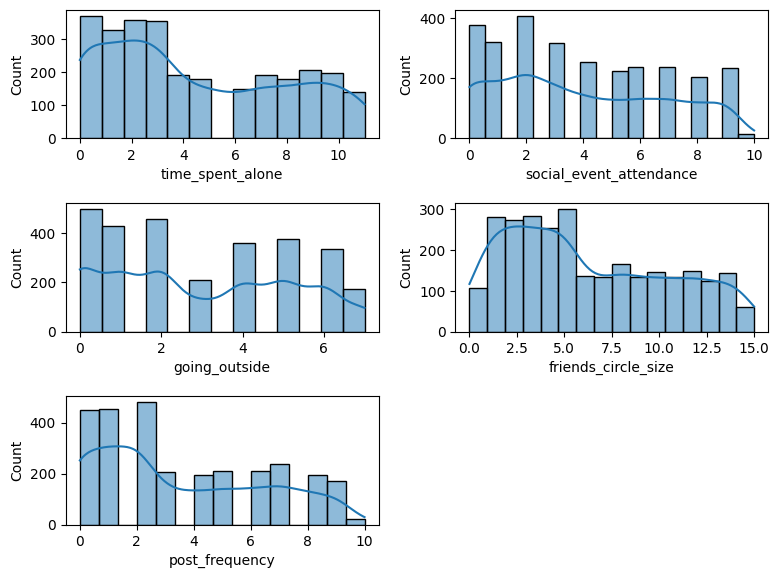

In [7]:
plt.figure(figsize=(8, 6))
plt.subplot(3, 2, 1)
sns.histplot(df['time_spent_alone'], kde=True)

plt.subplot(3, 2, 2)
sns.histplot(df['social_event_attendance'], kde=True)

plt.subplot(3, 2, 3)
sns.histplot(df['going_outside'], kde=True)

plt.subplot(3, 2, 4)
sns.histplot(df['friends_circle_size'], kde=True)

plt.subplot(3, 2, 5)
sns.histplot(df['post_frequency'], kde=True)

plt.tight_layout(pad=1.5);

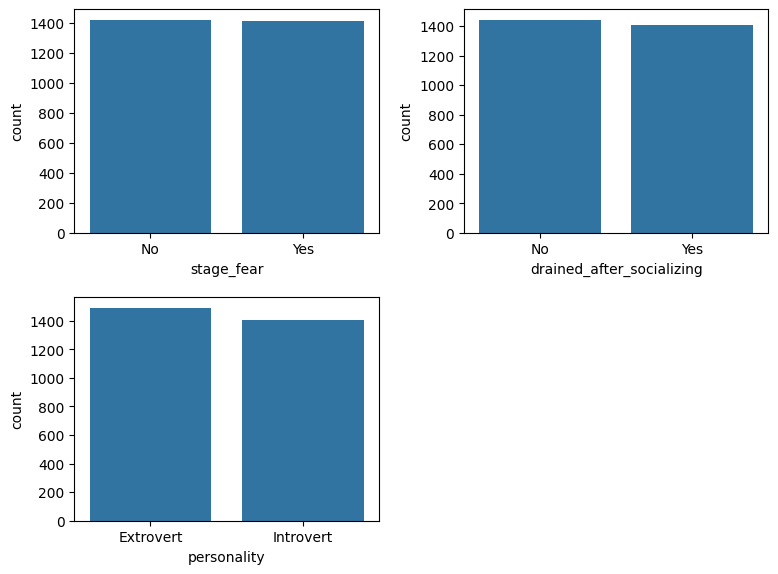

In [9]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
sns.countplot(x=df['stage_fear'])

plt.subplot(2, 2, 2)
sns.countplot(x=df['drained_after_socializing'])

plt.subplot(2, 2, 3)
sns.countplot(x=df['personality'])

plt.tight_layout(pad=1.5);

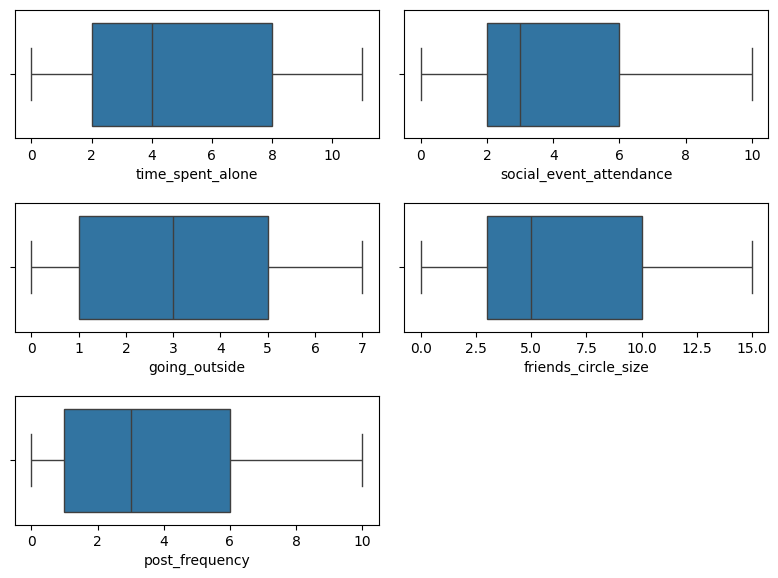

In [12]:
plt.figure(figsize=(8, 6))
plt.subplot(3, 2, 1)
sns.boxplot(x=df['time_spent_alone'])

plt.subplot(3, 2, 2)
sns.boxplot(x=df['social_event_attendance'])

plt.subplot(3, 2, 3)
sns.boxplot(x=df['going_outside'])

plt.subplot(3, 2, 4)
sns.boxplot(x=df['friends_circle_size'])

plt.subplot(3, 2, 5)
sns.boxplot(x=df['post_frequency'])

plt.tight_layout(pad=1.5);

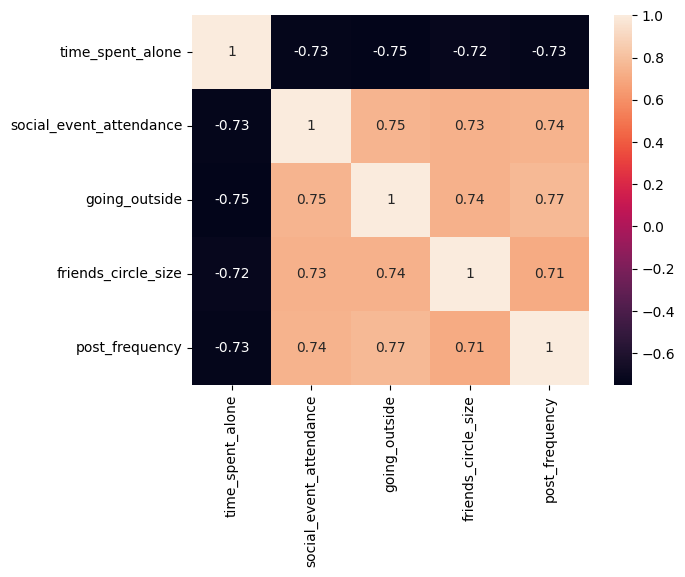

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [66]:
df.tail()

,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert
2899,3.0,No,6.0,6.0,No,6.0,9.0,Extrovert


In [14]:
cleaned_df = df.copy()
cleaned_df.head()

,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [15]:
(cleaned_df.isnull().sum()) / cleaned_df.shape[0]

time_spent_alone             0.021724
stage_fear                   0.025172
social_event_attendance      0.021379
going_outside                0.022759
drained_after_socializing    0.017931
friends_circle_size          0.026552
post_frequency               0.022414
personality                  0.000000
dtype: float64

In [19]:
cleaned_df['time_spent_alone'].fillna(cleaned_df['time_spent_alone'].mean(), inplace=True)
cleaned_df['stage_fear'].fillna(cleaned_df['stage_fear'].mode()[0], inplace=True)
cleaned_df['social_event_attendance'].fillna(cleaned_df['social_event_attendance'].median(), inplace=True)
cleaned_df['drained_after_socializing'].fillna(cleaned_df['drained_after_socializing'].mode()[0], inplace=True)
cleaned_df['friends_circle_size'].fillna(cleaned_df['friends_circle_size'].mean(), inplace=True)
cleaned_df['post_frequency'].fillna(cleaned_df['post_frequency'].median(), inplace=True)
cleaned_df['going_outside'].fillna(cleaned_df['going_outside'].median(), inplace=True)

In [21]:
cleaned_df.duplicated().sum()

np.int64(417)

In [22]:
cleaned_df.drop_duplicates(inplace=True)

In [24]:
cleaned_df.head()

,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [26]:
encode = LabelEncoder()
cleaned_df['stage_fear'] = encode.fit_transform(cleaned_df['stage_fear'])

In [27]:
cleaned_df.head()

,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
0,4.0,0,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,1,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,1,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,0,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,0,9.0,4.0,No,8.0,5.0,Extrovert


In [28]:
cleaned_df['drained_after_socializing'] = encode.fit_transform(cleaned_df['drained_after_socializing'])

In [29]:
cleaned_df['personality'] = encode.fit_transform(cleaned_df['personality'])

In [30]:
cleaned_df.head()

,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


In [32]:
cleaned_df.columns

Index(['time_spent_alone', 'stage_fear', 'social_event_attendance',
       'going_outside', 'drained_after_socializing', 'friends_circle_size',
       'post_frequency', 'personality'],
      dtype='object')

In [33]:
scaler = StandardScaler()
cleaned_df[['time_spent_alone', 'social_event_attendance','going_outside', 'friends_circle_size','post_frequency']] = scaler.fit_transform(
    cleaned_df[['time_spent_alone', 'social_event_attendance','going_outside', 'friends_circle_size','post_frequency']]
)

In [34]:
cleaned_df.head()

,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
0,-0.063035,0,-0.063475,1.262073,0,1.504039,0.405731,0
1,1.405616,1,-1.449050,-1.444471,1,-1.551111,-0.279829,1
2,1.405616,1,-1.102657,-0.542290,1,-0.376053,-0.622609,1
3,-1.237956,0,0.629312,1.713163,0,1.739051,1.434071,0
4,-0.356765,0,1.668494,0.359891,0,0.328982,0.405731,0


In [35]:
X = cleaned_df.drop(columns='personality')
y = cleaned_df['personality']

In [37]:
model_selection = {
    'Logistic Regression': LogisticRegression(),
    'K-Neighbors Classifier': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Support Vector Machine': SVC()
}

In [41]:
for name, model in model_selection.items():
    score = cross_val_score(model, X, y, cv=5)
    print(f"{name} Accuracy score is: {score.mean():.4f}")

Logistic Regression Accuracy score is: 0.9158
K-Neighbors Classifier Accuracy score is: 0.9150
Naive Bayes Accuracy score is: 0.9259
Decision Tree Classifier Accuracy score is: 0.8337
Support Vector Machine Accuracy score is: 0.9263


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
params_model = {
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC()
}

In [45]:
params_grid = {
    'Naive Bayes': {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    }, 
    'Support Vector Machine': {
        'C': [1, 10, 20, 30],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto']
    }
}

In [47]:
for name in params_model:
    grid = GridSearchCV(params_model[name], params_grid[name], cv=5, return_train_score=False, scoring='accuracy')
    grid.fit(X_train, y_train)

    print('Best estimator: ', grid.best_params_)
    print('Best score: ', grid.best_score_)

Best estimator:  {'var_smoothing': 1e-09}
Best score:  0.925767663718573
Best estimator:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best score:  0.925767663718573


In [50]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metrix='mlogloss')

parameter = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [52]:
grid_search = GridSearchCV(xgb_model, parameter, scoring='accuracy', cv=5, return_train_score=False)
grid_search.fit(X_train, y_train)

,estimator,"XGBClassifier...obs=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 1.0], 'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [50, 100, ...], ...}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [57]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 50,
 'subsample': 0.8}

In [53]:
y_pred = grid_search.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred)

0.9261744966442953

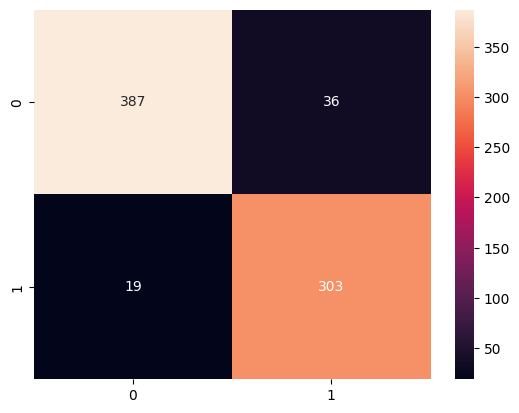

In [56]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d');

In [61]:
actual_model = XGBClassifier(
    use_label_encoder=False,
    eval_metrix='mlogloss',
    colsample_bytree= 0.8,
    learning_rate= 0.01,
    max_depth= 3,
    n_estimators= 50,
    subsample= 0.8
)

In [63]:
scaled_columns = ['time_spent_alone', 'social_event_attendance','going_outside', 'friends_circle_size','post_frequency']
column = ['drained_after_socializing', 'stage_fear']

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), scaled_columns),
        ('passthrough', 'passthrough', column)
    ]
)

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', actual_model)
])

pipeline.fit(X, y)

,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...), ('passthrough', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [64]:
jb.dump(pipeline, 'model.pkl')

['model.pkl']